# Linear Regression : Life Satisfaction Prediction

## Objectif du TP:

Prédire le score de satifaction dans la vie à l'aide d'une régression linéaire simple (une caractéristique) et multiple ( 2 caractéristiques ou plus). Vous :


    Utilisez les librairies Pandas — Pour gérer les données structurées, Scikit Learn — Pour l'apprentissage automatique, NumPy — Pour l'algèbre linéaire et les mathématiques, Matplotlib — Pour la visualisation des données.

    Écrivez une fonction pour calculer les poids (theta) de la régression linéaire simple à l'aide de Gradient Descent/ Equation Nomrale.

    Écrivez une fonction pour faire des prédictions de la sortie compte tenu de la caractéristique d'entrée.

    Inversez la régression pour prédire l'entrée/features compte tenu de la sortie

    Comparez deux modèles différents pour prévoir les prix des logements.
   


### 1 Import Modules, Load House Price Dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('lifeSatisfaction_data.csv')


#pritn(df.describe())  #Pour voir les détails statistiques de l'ensemble de données
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        782 non-null    int64  
 1   Country           782 non-null    object 
 2   Rank              782 non-null    int64  
 3   lifeSatisfaction  782 non-null    float64
 4   Support           782 non-null    float64
 5   GDP               782 non-null    float64
 6   Health            782 non-null    float64
 7   Freedom           782 non-null    float64
 8   Generosity        782 non-null    float64
 9   Corruption        782 non-null    float64
 10  Year              782 non-null    int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 67.3+ KB
None


### Dataset

Classement de 156 pays en fonction de la satisfaction de leurs citoyens sur la base de leurs évaluations de leur propre vie. Les classements du bonheur national sont basés sur une enquête sur l'échelle de Cantril. Des échantillons représentatifs au niveau national des répondants sont invités à penser à une échelle, la meilleure vie possible pour eux étant un 10, et la pire expérience possible est un 0. On leur demande ensuite d'évaluer leur propre vie actuelle sur cette échelle de 0 à 10. Le rapport corrèle les résultats avec divers facteurs de la vie. 


#### Analyse des caractéristiques:

GDP (PIB): Le PIB par habitant est une mesure de la production économique d'un pays qui tient compte de son nombre d'habitants.

Support(Soutien) : Le soutien social signifie que des amis et d'autres personnes, y compris la famille, se tournent vers vous en cas de besoin ou de crise pour vous donner une vision plus large et une image de soi positive. Le soutien social améliore la qualité de vie et fournit une protection contre les événements indésirables de la vie.

Health(Santé) : L'espérance de vie en bonne santé est le nombre moyen d'années pendant lesquelles un nouveau-né peut s'attendre à vivre en « pleine santé », c'est-à-dire sans être gêné par des maladies ou des blessures invalidantes.

Freedom (Liberté) : La liberté de choix décrit la possibilité et l'autonomie d'un individu d'effectuer une action choisie parmi au moins deux options disponibles, sans contrainte par des parties externes.

Generosity(Générosité): se définit comme le résidu de la régression de la moyenne nationale des réponses à la question : "Avez-vous donné de l'argent à un organisme de bienfaisance au cours des derniers mois ?" sur le PIB par habitant.

Corruption : L'indice de perception de la corruption (IPC) est un indice publié chaque année par Transparency International depuis 1995, qui classe les pays « en fonction de leurs niveaux perçus de corruption dans le secteur public, tels que déterminés par des évaluations d'experts et des sondages d'opinion ».

### 2 Split data (train and Test)

Training set: a subset to train a model. 

test set: a subset to test the trained model

In [2]:
train_data=pd.read_csv("lifeSatisfaction_train_data.csv")

test_data=pd.read_csv("lifeSatisfaction_test_data.csv")

print("Train shape",train_data.shape)
print("Test shape",test_data.shape)

Train shape (625, 11)
Test shape (157, 11)


In [3]:
features='lifeSatisfaction'
b=train_data[features]

b

0      4.459
1      4.508
2      5.695
3      6.105
4      6.324
       ...  
620    3.484
621    6.028
622    5.589
623    5.920
624    4.786
Name: lifeSatisfaction, Length: 625, dtype: float64

### 3 Construire un modèle de régression linéaire générique 

#### 3.1 La fonction : get_X_y(data, features, output)  return X ,y

Ecrivez une fonction qui prend un ensemble de données, une liste de caractéristiques à utiliser comme Input, et un nom de sortie (par exemple 'LifeSatisfaction'). Cette fonction doit renvoyer X (numpy array)composé d'abord d'une colonne de uns suivie de colonnes contenant les valeurs des features d'entrée dans l'ensemble de données dans le même ordre que la liste d'entrée. Il doit également renvoyer un y qui est un tableau (numpy array) des valeurs de la sortie dans l'ensemble de données. 


In [4]:
def get_X_y(data, features, output):
    
     # Ajoute une colonne constante( x0=1)
 
    data = pd.concat([pd.Series(1, index=data.index, name='constante'),data], axis=1)

    # ajoute la variable 'constante' à la liste des fonctionnalités

    
    features.insert(0,'constante')
    #X
    X=data[features]
    
    #y
    y=data[output]
    return(X, y)


#### 3.2 La fonction d hypothèse: linearRegression_model(X, theta)  return y

Ecrivez La fonction : linearRegression_model qui prend en paramètres la matrice X et le vecteur θ  et qui retourne le vecteur y= X.θ 

In [5]:
def linearRegression_model(X,theta):
    y_pred=X*theta
    y_pred=np.sum(y_pred,axis=1)
    return y_pred

## 3.3 La Fonction du coût (Cost Function)
Avant de pouvoir utiliser notre modèle, Nous devons définir les valeurs des paramètres θ. 
Comment savoir quelles valeurs permettront à notre modèle d être le plus performant ?
Pour les problèmes de régression linéaire, les gens utilisent généralement la fonction de coût (l’erreur quadratique moyenne (Mean Squared Error))  qui mesure la distance entre les prédictions du modèle linéaire (y_pred) et les valeurs réelles (y_Train). ==> l objectif est de minimiser cette distance.

Rappel:

Une fonction de perte (L(y_pred,y_true)), ou Loss function, est une fonction qui évalue l’écart entre la prédiction réalisée et la valeur réelle pour une observation donnée.

J(θ) est une fonction de coût de l'ensemble d'apprentissage et est obtenue en faisant la moyenne de la somme de la fonction de perte.


In [6]:
def cost_function(X, y, theta):
    m = len(y) # Nombre des exemples d'entrainement
    #Complétez le code
    h=linearRegression_model(X,theta)
    J=sum((h-y)**2)/(2*m)
    return J

#### 3.4 Minimisation de la fonction de coût : 

Minimiser la fonction du coût ==> trouver les paramètres qui permettent au modèle linéaire de s'adapter au mieux à vos données. C'est ce qu'on appelle l'entraînement du modèle.

##### 3.4.1. Gradient Descent

Pour trouver le minimum, on utilise un algorithme d’optimisation qui s’appelle Gradient Descent (la descente de gradient).

Les étapes de l’algorithme Gradient Descent sont :

    1/Choisir un point de départ (initialisation de Ɵ).
    2/Calculer le gradient à ce point.
    3/Faire un pas gradué dans le sens opposé au gradient(objectif : minimiser).
    4/Répéter les étapes 2 et 3 jusqu'à ce qu'un des critères soit rempli : 
            Nombre maximum d'itérations atteint.
            La taille du pas est inférieure à la tolérance (tolérance pour arrêter conditionnellement l'algorithme (exemple, une valeur par défaut est 0,001)

In [43]:
def gradient(X, y, theta): 
    #Complétez le code
    m = len(y)
    grad=[]
    h=linearRegression_model(X,theta)
    for k in range(len(X.columns)):
        z=X.iloc[:,k]
        grad.append(sum((h-y)*z)/m)
    grad=np.array(grad)

    return grad

def gradientDescent(X, y, initial_theta, alpha, num_iters,tolerance):
  m = len(y) # Nombre des exemples d'entrainement
  J_history = []
  theta=initial_theta
  # répéter jusqu'à convergence
  for i in range(num_iters):   
    #Modification de theta
    theta=theta-alpha*gradient(X, y, theta)
    # Sauvegarder le coût J à chaque itération dans J_history    
    J_history.append(cost_function(X, y, theta))

    #tolérance pour arrêter conditionnellement l'algorithme
    #if(i>2 and abs(J_history[-1]-J_history[-2])<tolerance):
        #break
   
  return theta, J_history

#### 3.4.2. Equation Normale

L'Equation Normale peut trouver directement la valeur de θ sans recourir à un algorithme itératif. 


In [26]:
from numpy.linalg import inv

def normal_equation(X,y):
    #Complétez le code
    
    theta=np.dot(np.dot(inv(np.dot(X.T,X)),X.T),y)
    return theta


### Simple Linear Regression (One feature)


Calculer theta sur les données d'entraînement pour prédire le "score de satisfaction dans la vie" compte tenu du "PIB".

#### 1. Avec Gradient Descent:

Trouvez la combinaison des hyperparamètres(alpha, num_iteration, tolerance,initial_theta) qui donne le meilleur ajustement.


In [54]:
features=["GDP"]
output="lifeSatisfaction"


X_train,y_train=get_X_y(train_data, features, output)

print(X_train)

#n est Nombre des features et m est le nombre des exemples
m,n=X_train.shape

initial_theta=np.zeros(n)
num_iters=3000
alpha=0.003
tolerance=0.001

theta_gd,cost_history=gradientDescent(X_train, y_train, initial_theta, alpha, num_iters,tolerance)




     constante       GDP
0            1  1.024160
1            1  0.292830
2            1  1.070080
3            1  1.338000
4            1  0.834540
..         ...       ...
620          1  0.394990
621          1  0.912000
622          1  0.811980
623          1  1.416915
624          1  0.855630

[625 rows x 2 columns]


#### Tracer le graphe de convergence

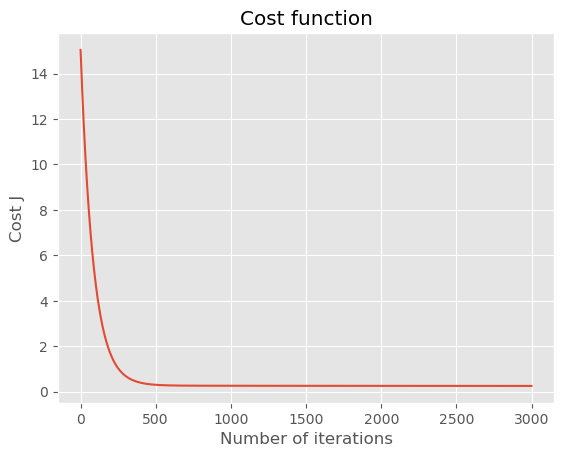

In [55]:
plt.plot(cost_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.title("Cost function")
plt.show()

#### 2. Avec l'Equation Normale:

Trouvez les meilleurs paramètres theta avec l équation normale.

In [27]:
# Complétez le code
features=["GDP"]
output="lifeSatisfaction"


X,y=get_X_y(train_data, features, output)
theta2=normal_equation(X,y)
theta2

array([3.2242735 , 2.29678725])

#### Q1. Quelle est la valeur du poids pour sqft_living ? (avec : Gradient descent et equation  normale)?


#### Evaluer la performance de notre modèle sur l'ensemble d'entrainement (Avec gradient descent et Equation normale)

L'évaluation de la précision du modèle est une partie essentielle du processus de création de modèles d'apprentissage automatique pour décrire les performances du modèle dans ses prédictions. Les métriques d'évaluation changent en fonction du type de problème.

Les métriques MSE, MAE, RMSE et R au carré sont principalement utilisées pour évaluer les taux d'erreur de prédiction et les performances du modèle dans l'analyse de régression.

Ecrivez la fonction qui permet de calculer RMSE.


In [49]:
from math import sqrt
def rmse_function(y_pred,y_true):
    #Complétez le code
    MSE = np.square(np.subtract(y_true,y_pred)).mean()
    rmse =sqrt(MSE)
    return rmse


#### Calculez le RMSE de Y_pred et Y_train

In [56]:
y_pred_gd_train=linearRegression_model(X_train,theta_gd)
y_pred_normal_train=linearRegression_model(X_train,theta2)

print("Train RMSE GD",rmse_function(y_pred_gd_train,y_train))
print("Train RMSE Eq Normale",rmse_function(y_pred_normal_train,y_train))

Train RMSE GD 0.7113125643762677
Train RMSE Eq Normale 0.7045467414598001


#### Visualisation 

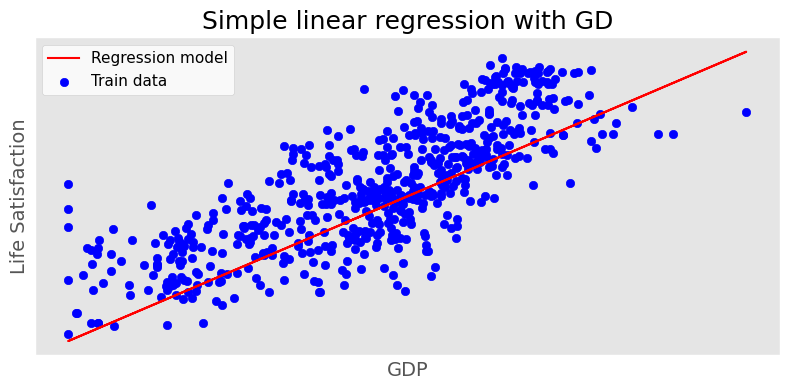

In [34]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(train_data['GDP'], y_pred_gd_train, color='red', label='Regression model')
ax.scatter(train_data['GDP'], y_train, color='blue',  label='Train data')
ax.set_ylabel('Life Satisfaction', fontsize=14)
ax.set_xlabel('GDP', fontsize=14)

ax.legend(facecolor='white', fontsize=11)
ax.set_title('Simple linear regression with GD', fontsize=18)

plt.xticks(())
plt.yticks(())
fig.tight_layout()

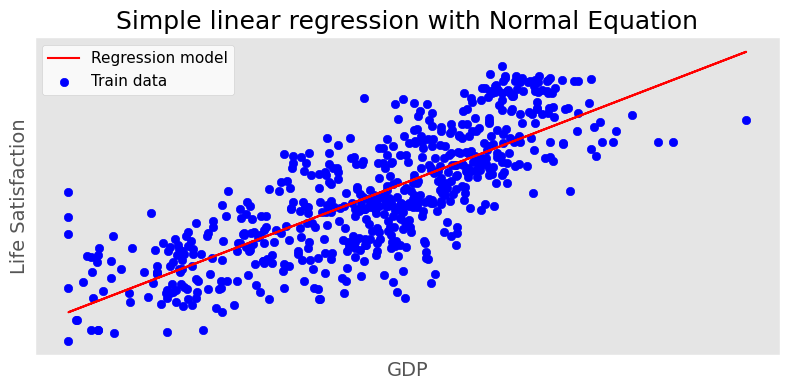

In [35]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(train_data['GDP'], y_pred_normal_train, color='red', label='Regression model')
ax.scatter(train_data['GDP'], y_train, color='blue',  label='Train data')
ax.set_ylabel('Life Satisfaction', fontsize=14)
ax.set_xlabel('GDP', fontsize=14)

ax.legend(facecolor='white', fontsize=11)
ax.set_title('Simple linear regression with Normal Equation', fontsize=18)

plt.xticks(())
plt.yticks(())
fig.tight_layout()

### Prédiction : Tester la performance du modèle sur l'ensemble de Test



#### Q2. Quel est le prix prévu pour la 1ère maison dans l'ensemble de données TEST ?

In [57]:
#Complétez le code
features_t=["GDP"]
output_t="lifeSatisfaction"


X_test,y_test=get_X_y(test_data, features_t, output_t)
y_pred_gd_test=linearRegression_model(X_test,theta_gd)
y_pred_normal_test=linearRegression_model(X_test,theta2)


print("Test RMSE GD",rmse_function(y_pred_gd_test,y_test))
print("Test RMSE Eq Normale",rmse_function(y_pred_normal_test,y_test))

Test RMSE GD 0.7373404972641358
Test RMSE Eq Normale 0.7296356269290544


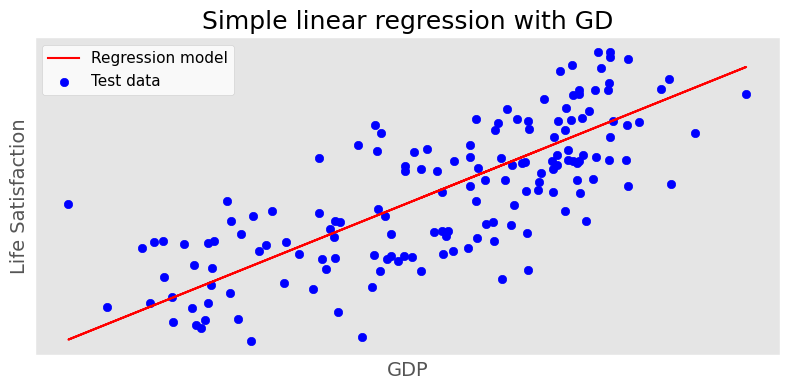

In [58]:
#Visualiation 

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(test_data['GDP'], y_pred_gd_test, color='red', label='Regression model')
ax.scatter(test_data['GDP'], y_test, color='blue',  label='Test data')
ax.set_ylabel('Life Satisfaction', fontsize=14)
ax.set_xlabel('GDP', fontsize=14)

ax.legend(facecolor='white', fontsize=11)
ax.set_title('Simple linear regression with GD', fontsize=18)

plt.xticks(())
plt.yticks(())
fig.tight_layout()